In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv("all_plays_features.csv")
df.head()

,play_uuid,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,...,week,cumulativeOverall_O,cumulativeOverall_D,cumulativeOverall_P,cumulativePerFormation_O,cumulativePerFormation_D,cumulativePerFormation_P,cumulativePerBoxCt_O,cumulativePerBoxCt_D,cumulativePerBoxCt_P
0,2.022091e+09,2022090800,101,47857,Devin Singletary,(13:54) D.Singletary right end to BUF 45 for 7...,1,1,10,BUF,...,1,0.500000,0.500000,0.0,0.000000,0.000000,0.0,0.500000,0.500000,0.0
1,2.022091e+09,2022090800,1030,52536,Gabe Davis,(11:44) (Shotgun) J.Allen pass short left to G...,2,3,2,BUF,...,1,0.444444,0.555556,0.5,0.363636,0.636364,0.0,0.000000,0.000000,0.0
2,2.022091e+09,2022090800,1102,52494,Zack Moss,"(9:37) (No Huddle, Shotgun) J.Allen pass short...",2,2,6,BUF,...,1,0.473684,0.526316,0.0,0.416667,0.583333,0.0,0.437500,0.562500,0.0
3,2.022091e+09,2022090800,1187,47853,Darrell Henderson,(8:48) D.Henderson right tackle to LA 44 for 4...,2,1,10,LAR,...,1,0.200000,0.800000,0.0,0.000000,1.000000,0.0,0.142857,0.857143,0.0
4,2.022091e+09,2022090800,122,47857,Devin Singletary,(13:15) (Shotgun) J.Allen pass short right to ...,1,2,3,BUF,...,1,0.333333,0.666667,0.0,0.000000,1.000000,0.0,0.333333,0.666667,0.0


In [3]:
df.columns

Index(['play_uuid', 'gameId', 'playId', 'ballCarrierId',
       'ballCarrierDisplayName', 'playDescription', 'quarter', 'down',
       'yardsToGo', 'possessionTeam', 'defensiveTeam', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'passLength', 'penaltyYards',
       'prePenaltyPlayResult', 'playResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2', 'converted',
       'blocked', 'playType', 'ballDirection', 'timestamp', 'week',
       'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P',
       'cumulativePerFormation_O', 'cumulativePerFormation_D',
       'cumulativePerFormation

In [5]:
## Seperate the features, X,  from the target variable, y
# Keep meaningful features and target
#existing_features_to_keep = ['quarter', 'yardsToGo','preSnapHomeScore',
#       'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox',
#        'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
#        'visitorTeamWinProbilityAdded', 'down']
#
#created_features_to_keep = ['playType', 'ballDirection', 'cumulativeOverall_O',
#        'cumulativeOverall_D', 'cumulativeOverall_P', 'cumulativePerFormation_O', 'cumulativePerFormation_D',
#        'cumulativePerFormation_P', 'cumulativePerBoxCt_O', 'cumulativePerBoxCt_D', 'cumulativePerBoxCt_P', 'week']


existing_features_to_keep = ['quarter', 'yardsToGo','preSnapHomeScore', 'ballCarrierId',
        'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']

created_features_to_keep = ['playType', 'ballDirection', 'cumulativeOverall_O', 'week',
        'cumulativeOverall_D', 'cumulativeOverall_P', 'cumulativePerFormation_O', 'cumulativePerFormation_D',
        'cumulativePerFormation_P', 'cumulativePerBoxCt_O', 'cumulativePerBoxCt_D', 'cumulativePerBoxCt_P']

features_0 = ['homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded']
features_1 = ['ballDirection']
features_2 = ['playType']
features_3 = ['week']
features_4 = ['cumulativePerFormation_P', 'cumulativePerBoxCt_P']
features_5 = ['cumulativePerFormation_O', 'cumulativePerBoxCt_O']
features_6 = ['cumulativePerFormation_D', 'cumulativePerBoxCt_D']
features_7 = ['cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P']
features_8 = existing_features_to_keep

features_list = [features_0, features_1, features_2, features_3, features_4, features_5, features_6, features_7, features_8]

current_features = [item for sublist in features_list for item in sublist]

print(current_features)

['homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'ballDirection', 'playType', 'week', 'cumulativePerFormation_P', 'cumulativePerBoxCt_P', 'cumulativePerFormation_O', 'cumulativePerBoxCt_O', 'cumulativePerFormation_D', 'cumulativePerBoxCt_D', 'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P', 'quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']


In [7]:
accuracy_list = []
precision_list = []
recall_list = []

Accuracy Score : 0.7885293175264338
Recall Score : 0.6528013582342954
Precision Score : 0.753921568627451
The current list of features is: ['homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'ballDirection', 'playType', 'week', 'cumulativePerFormation_P', 'cumulativePerBoxCt_P', 'cumulativePerFormation_O', 'cumulativePerBoxCt_O', 'cumulativePerFormation_D', 'cumulativePerBoxCt_D', 'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P', 'quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1692,251
Actual 1,409,769


Accuracy Score : 0.7885293175264338
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1943
           1       0.75      0.65      0.70      1178

    accuracy                           0.79      3121
   macro avg       0.78      0.76      0.77      3121
weighted avg       0.79      0.79      0.79      3121

Accuracy Score : 0.7446331304069208
Recall Score : 0.5492359932088285
Precision Score : 0.7086527929901424
The current list of features is: ['ballDirection', 'playType', 'week', 'cumulativePerFormation_P', 'cumulativePerBoxCt_P', 'cumulativePerFormation_O', 'cumulativePerBoxCt_O', 'cumulativePerFormation_D', 'cumulativePerBoxCt_D', 'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P', 'quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1677,266
Actual 1,531,647


Accuracy Score : 0.7446331304069208
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1943
           1       0.71      0.55      0.62      1178

    accuracy                           0.74      3121
   macro avg       0.73      0.71      0.71      3121
weighted avg       0.74      0.74      0.74      3121

Accuracy Score : 0.7363024671579622
Recall Score : 0.5449915110356537
Precision Score : 0.6910656620021528
The current list of features is: ['playType', 'week', 'cumulativePerFormation_P', 'cumulativePerBoxCt_P', 'cumulativePerFormation_O', 'cumulativePerBoxCt_O', 'cumulativePerFormation_D', 'cumulativePerBoxCt_D', 'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P', 'quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1656,287
Actual 1,536,642


Accuracy Score : 0.7363024671579622
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1943
           1       0.69      0.54      0.61      1178

    accuracy                           0.74      3121
   macro avg       0.72      0.70      0.71      3121
weighted avg       0.73      0.74      0.73      3121

Accuracy Score : 0.7305350849086831
Recall Score : 0.49830220713073003
Precision Score : 0.7013142174432497
The current list of features is: ['week', 'cumulativePerFormation_P', 'cumulativePerBoxCt_P', 'cumulativePerFormation_O', 'cumulativePerBoxCt_O', 'cumulativePerFormation_D', 'cumulativePerBoxCt_D', 'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P', 'quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1693,250
Actual 1,591,587


Accuracy Score : 0.7305350849086831
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1943
           1       0.70      0.50      0.58      1178

    accuracy                           0.73      3121
   macro avg       0.72      0.68      0.69      3121
weighted avg       0.73      0.73      0.72      3121

Accuracy Score : 0.731496315283563
Recall Score : 0.49575551782682514
Precision Score : 0.7053140096618358
The current list of features is: ['cumulativePerFormation_P', 'cumulativePerBoxCt_P', 'cumulativePerFormation_O', 'cumulativePerBoxCt_O', 'cumulativePerFormation_D', 'cumulativePerBoxCt_D', 'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P', 'quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1699,244
Actual 1,594,584


Accuracy Score : 0.731496315283563
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1943
           1       0.71      0.50      0.58      1178

    accuracy                           0.73      3121
   macro avg       0.72      0.69      0.69      3121
weighted avg       0.73      0.73      0.72      3121

Accuracy Score : 0.7183595001602051
Recall Score : 0.4838709677419355
Precision Score : 0.6777645659928656
The current list of features is: ['cumulativePerFormation_O', 'cumulativePerBoxCt_O', 'cumulativePerFormation_D', 'cumulativePerBoxCt_D', 'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P', 'quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1672,271
Actual 1,608,570


Accuracy Score : 0.7183595001602051
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1943
           1       0.68      0.48      0.56      1178

    accuracy                           0.72      3121
   macro avg       0.71      0.67      0.68      3121
weighted avg       0.71      0.72      0.71      3121

Accuracy Score : 0.7215636014098046
Recall Score : 0.49575551782682514
Precision Score : 0.6798603026775321
The current list of features is: ['cumulativePerFormation_D', 'cumulativePerBoxCt_D', 'cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P', 'quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1668,275
Actual 1,594,584


Accuracy Score : 0.7215636014098046
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      1943
           1       0.68      0.50      0.57      1178

    accuracy                           0.72      3121
   macro avg       0.71      0.68      0.68      3121
weighted avg       0.72      0.72      0.71      3121

Accuracy Score : 0.7170778596603653
Recall Score : 0.48896434634974534
Precision Score : 0.6721120186697783
The current list of features is: ['cumulativeOverall_O', 'cumulativeOverall_D', 'cumulativeOverall_P', 'quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1662,281
Actual 1,602,576


Accuracy Score : 0.7170778596603653
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1943
           1       0.67      0.49      0.57      1178

    accuracy                           0.72      3121
   macro avg       0.70      0.67      0.68      3121
weighted avg       0.71      0.72      0.71      3121

Accuracy Score : 0.6904838192886895
Recall Score : 0.4847198641765705
Precision Score : 0.613978494623656
The current list of features is: ['quarter', 'yardsToGo', 'preSnapHomeScore', 'ballCarrierId', 'preSnapVisitorScore', 'offenseFormation', 'defendersInTheBox', 'down']
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1584,359
Actual 1,607,571


Accuracy Score : 0.6904838192886895
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.82      0.77      1943
           1       0.61      0.48      0.54      1178

    accuracy                           0.69      3121
   macro avg       0.67      0.65      0.65      3121
weighted avg       0.68      0.69      0.68      3121



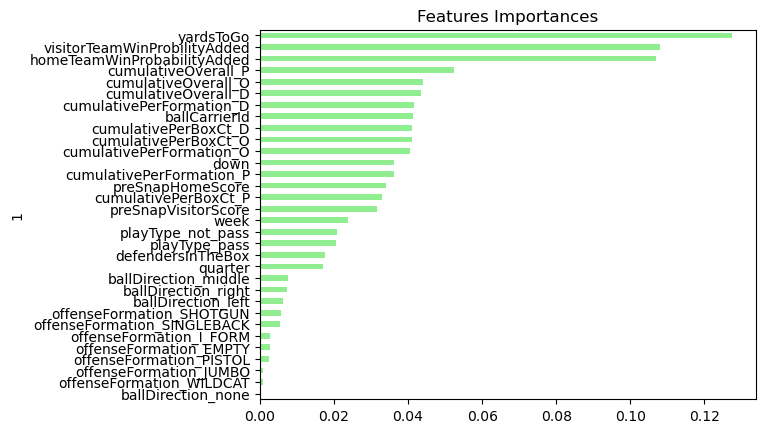

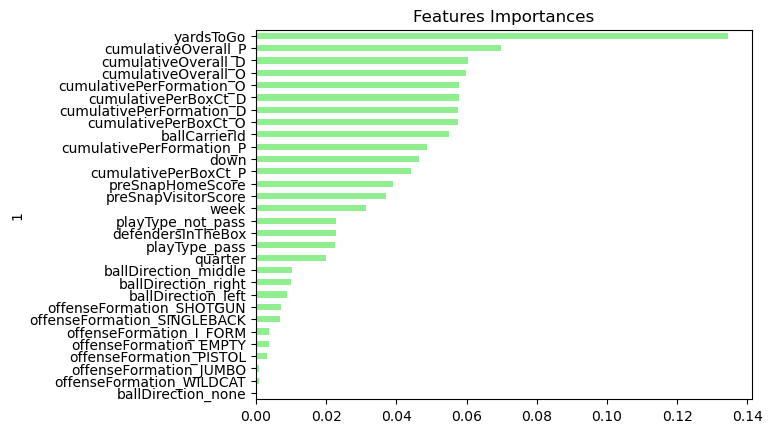

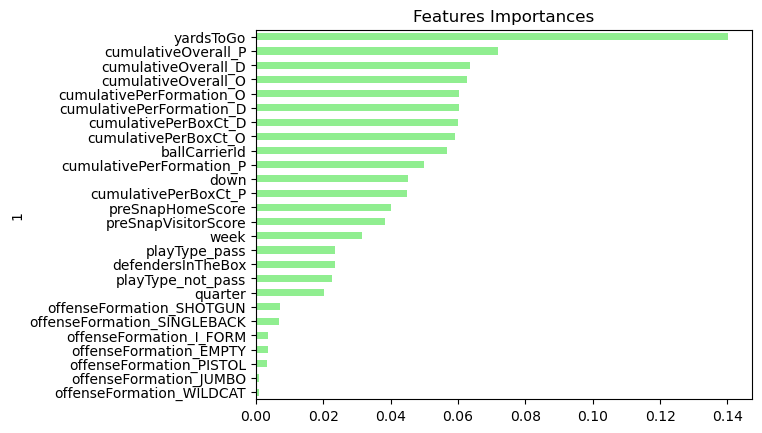

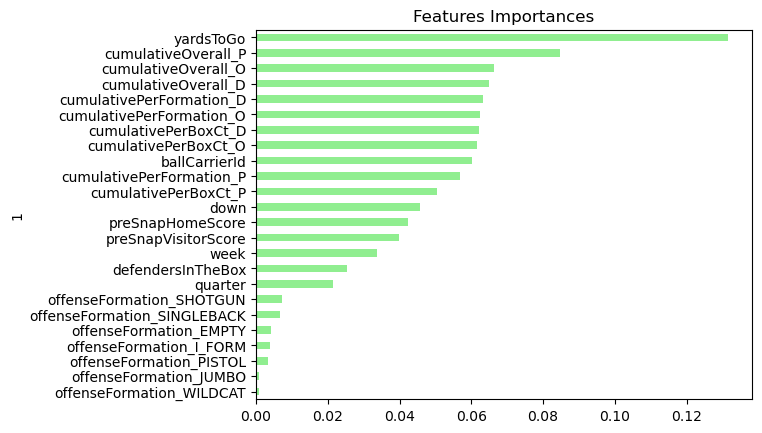

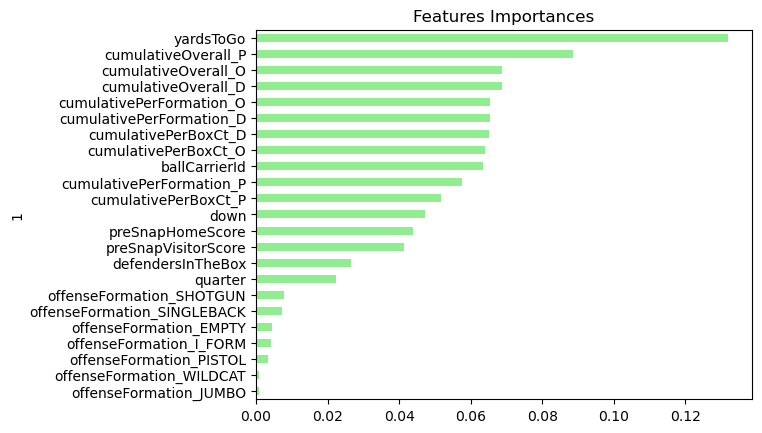

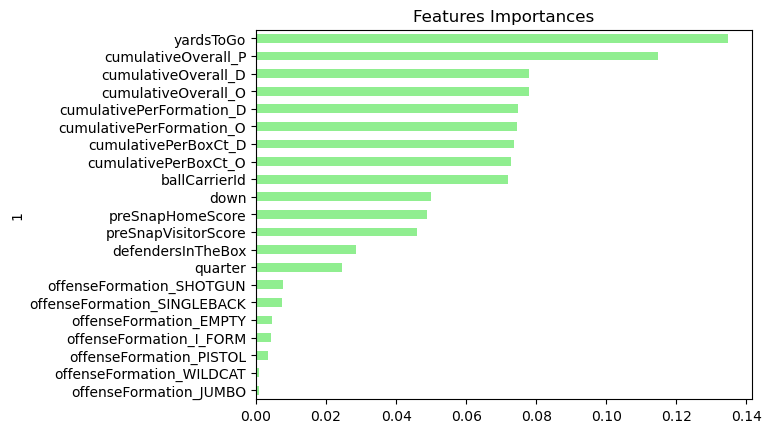

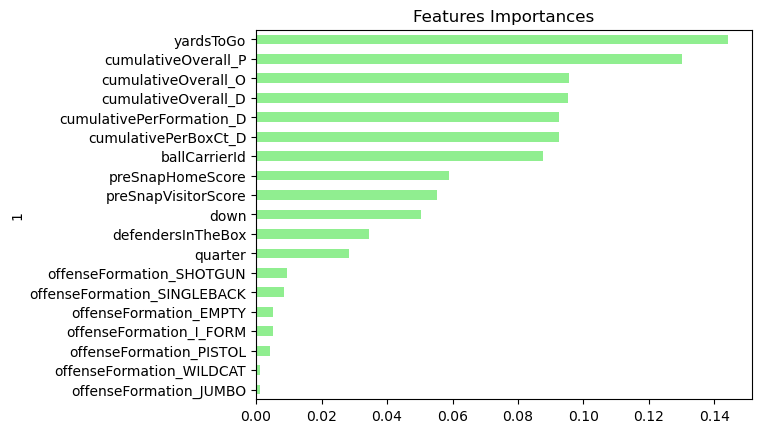

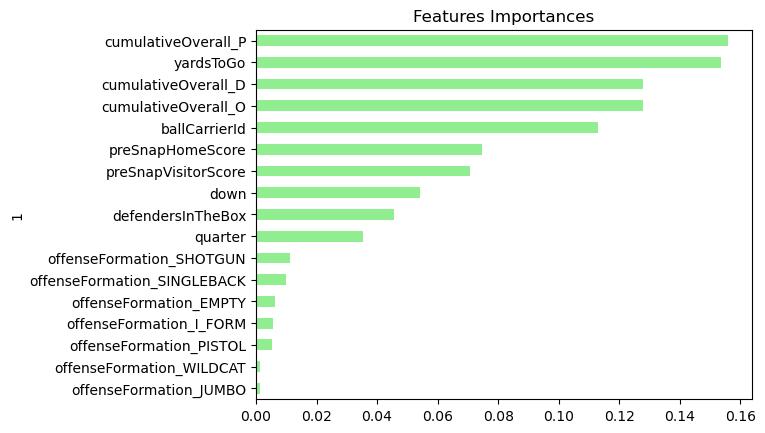

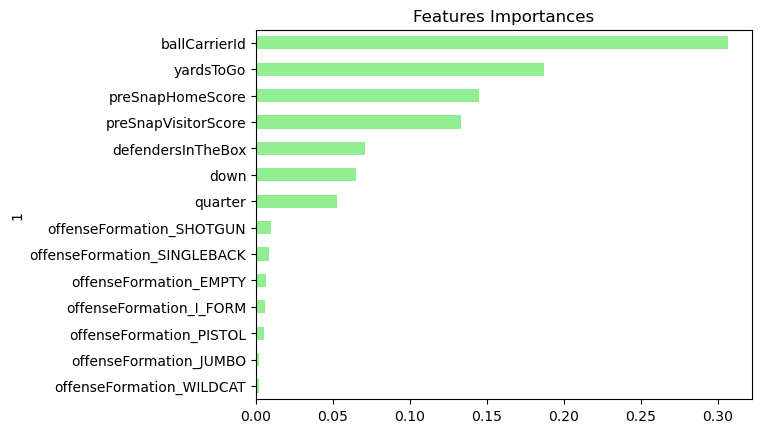

In [8]:
for i in range(0, len(features_list)):
    
    if i != 0:          
        current_features = [x for x in current_features if x not in features_list[i-1]]      

    X = df[current_features]     
   
    
    # Define target vector
    y = df['converted'].ravel()
    y[:5]
    
    # Convert categorical data to numeric with `pd.get_dummies`
    X = pd.get_dummies(X)
    
    # Splitting into Train and Test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
    
    # Creating StandardScaler instance
    scaler = StandardScaler()
    
    # Fitting Standard Scaller
    X_scaler = scaler.fit(X_train)
    
    # Scaling data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    # Create a random forest classifier
    rf_model = RandomForestClassifier(n_estimators=750, random_state=78)
    
    # Fitting the model
    rf_model = rf_model.fit(X_train_scaled, y_train)
    
    # Making predictions using the testing data
    predictions = rf_model.predict(X_test_scaled)
    
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )
    
    # Calculating the accuracy score
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    
    print(f"Accuracy Score : {accuracy}")
    print(f"Recall Score : {recall}")
    print(f"Precision Score : {precision}")
    
    print(f"The current list of features is: {current_features}")
    
    # Displaying results
    print("Confusion Matrix")
    display(cm_df)
    print(f"Accuracy Score : {accuracy}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    # Random Forests in sklearn will automatically calculate feature importance
    importances = rf_model.feature_importances_
    # We can sort the features by their importance
    sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
    
    # Visualize the features by importance
    importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
    importances_df.set_index(importances_df[1], inplace=True)
    importances_df.drop(columns=1, inplace=True)
    importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
    importances_sorted = importances_df.sort_values(by='Feature Importances')
    importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
    
    

In [9]:
#accuracy_list.pop(0)
#recall_list.pop(0)

results_table = pd.DataFrame({'features_added':features_list,
                              'accuracy':accuracy_list,
                              'precision':precision_list,
                              'recall':recall_list})
results_reversed = results_table.iloc[::-1]

In [10]:
results_reversed


,features_added,accuracy,precision,recall
8,"[quarter, yardsToGo, preSnapHomeScore, ballCar...",0.690484,0.613978,0.484720
7,"[cumulativeOverall_O, cumulativeOverall_D, cum...",0.717078,0.672112,0.488964
6,"[cumulativePerFormation_D, cumulativePerBoxCt_D]",0.721564,0.679860,0.495756
5,"[cumulativePerFormation_O, cumulativePerBoxCt_O]",0.718360,0.677765,0.483871
4,"[cumulativePerFormation_P, cumulativePerBoxCt_P]",0.731496,0.705314,0.495756
3,[week],0.730535,0.701314,0.498302
2,[playType],0.736302,0.691066,0.544992
1,[ballDirection],0.744633,0.708653,0.549236
0,"[homeTeamWinProbabilityAdded, visitorTeamWinPr...",0.788529,0.753922,0.652801


In [ ]:
print(features_list)
len(features_list)

In [ ]:
print(precision_list)
len(precision_list)

In [ ]:
accuracy_list.pop(0)
print(accuracy_list)
len(accuracy_list)

In [ ]:
recall_list.pop(0)
print(recall_list)
len(recall_list)

In [ ]:
import matplotlib.pyplot as plt
#importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)
plt.savefig('importances_sorted.png')
plt.show()